In [1]:
import pandas as pd

data = pd.read_csv('data/dataset_processed.csv')
data.head()

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Electrolyte,Current collector,Active mass loading,Potential window,Current density,Specific capacity,micro%
0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,1.488390,1.029,2M ZnSO4,carbon cloth,1.0,1.6,0.10,85.0,0.939857
1,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,1.555961,1.038,2M ZnSO4,carbon cloth,1.0,1.6,0.10,114.0,0.931392
2,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.10,90.2,0.209302
3,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.25,86.3,0.209302
4,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.50,79.9,0.209302


In [2]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Active mass loading,...,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2,Current collector_carbon cloth,Current collector_freestanding,Current collector_graphite paper,Current collector_nickel foam,Current collector_stainless steel,Current collector_stainless-steel foil,Current collector_stainless-steel mesh,Current collector_titanium foil
0,7.15,3.52,0.00,0.0,0.0,1546.1,0.5753,1.488390,1.029,1.0,...,True,False,True,False,False,False,False,False,False,False
1,8.12,3.79,3.66,0.0,0.0,1315.2,0.5116,1.555961,1.038,1.0,...,True,False,True,False,False,False,False,False,False,False
2,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,2.5,...,False,False,False,False,False,False,False,False,True,False
3,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,2.5,...,False,False,False,False,False,False,False,False,True,False
4,21.55,3.29,0.00,0.0,0.0,1140.8,0.8600,3.015428,0.820,2.5,...,False,False,False,False,False,False,False,False,True,False


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_encoded['target_class'] = pd.qcut(data_encoded['Specific capacity'], q=10, labels=False)
X = data_encoded.drop(['Specific capacity', 'target_class'], axis=1)
y = data_encoded['Specific capacity']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled, X_test_scaled, y_train, y_test

(            O         N         B         S         P  Specific surface area  \
 0    1.526124 -0.131350 -0.234739 -0.248555 -0.168462               1.510823   
 1   -0.297092 -1.055675 -0.234739 -0.248555 -0.168462              -1.096975   
 2    1.526124 -0.131350 -0.234739 -0.248555 -0.168462               1.510823   
 3   -0.148258 -0.202180 -0.234739 -0.248555 -0.168462               0.809291   
 4   -0.952892 -0.439458 -0.234739 -0.248555 -0.168462              -0.133456   
 ..        ...       ...       ...       ...       ...                    ...   
 500 -0.148258 -0.202180 -0.234739 -0.248555 -0.168462               0.809291   
 501 -0.597086 -0.081769 -0.234739 -0.248555 -0.168462              -0.541288   
 502 -1.306373 -1.055675 -0.234739 -0.248555 -0.168462               1.637461   
 503 -0.520343 -0.290716  3.440043 -0.248555 -0.168462               0.644215   
 504  0.151735  0.162592 -0.234739 -0.248555 -0.168462              -0.181253   
 
      Pore volume       Da

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def calculate_metrics(y_true, y_pred):
    """
    Calculate and return actual vs pred fig for data_dopants metrics.
    """
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    rmse = root_mean_squared_error(y_true, y_pred)
    return r2, mae, mape, rmse


def metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, model_name):
    R2_train, MAE_train, MAPE_train, RMSE_train = calculate_metrics(y_train, y_train_pred)
    R2_test, MAE_test, MAPE_test, RMSE_test = calculate_metrics(y_test, y_test_pred)
    metrics = {'model': model_name,
                   'R2_train': R2_train, 'MAE_train': MAE_train, 'MAPE_train': MAPE_train, 'RMSE_train': RMSE_train,
                   'R2_test': R2_test, 'MAE_test': MAE_test, 'MAPE_test': MAPE_test, 'RMSE_test': RMSE_test}
    model_name_df = pd.DataFrame([metrics])
    return model_name_df

def plot_actual_vs_predicted(y_train, y_pred_train, y_test, y_pred_test, figpath=None):
    """
    Plot the actual vs predicted values for both training and test sets,
    and plot y=x as the fit line.
    """
    # 设置全局字体为Times New Roman，字号为32，字体粗细为粗体
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 32,
        'font.weight': 'bold',
        'figure.figsize': (10, 10)  # 设置图像尺寸为10x10英寸
    })

    # 绘制训练集和测试集的散点图
    plt.scatter(y_train, y_pred_train, color='blue', label='Train', s=50, alpha=0.5)
    plt.scatter(y_test, y_pred_test, color='red', label='Test', s=50, alpha=0.5)

    # 计算合并数据的最小值和最大值，用于设置坐标轴范围和绘制y=x线
    y_pred_train = y_pred_train.ravel()
    y_pred_test = y_pred_test.ravel()
    y_combined = np.concatenate([y_train, y_pred_train, y_test, y_pred_test])
    min_val, max_val = np.min(y_combined), np.max(y_combined)
    padding = (max_val - min_val) * 0.05
    padded_min, padded_max = min_val - padding, max_val + padding

    # 绘制y=x的虚线，线宽为3
    plt.plot([padded_min, padded_max], [padded_min, padded_max], 'k--', lw=3, label='Regression Line')

    # 设置标题和轴标签，明确指定加粗
    plt.title('Actual vs Predicted Values', fontweight='bold')
    plt.xlabel('Actual Values', fontweight='bold')
    plt.ylabel('Predicted Values', fontweight='bold')

    # 设置图例，无边框，位于左上角
    plt.legend(frameon=False, loc='upper left', fontsize=28)

    # 设置坐标轴为相同比例，并且坐标轴范围一致
    plt.axis('equal')
    plt.xlim([padded_min, padded_max])
    plt.ylim([padded_min, padded_max])

    # 设置刻度线的长度和粗细
    plt.tick_params(axis='both', which='major', length=10, width=2, labelsize=32)

    # 检查并统一X轴和Y轴的刻度
    # 可以通过设置两个轴的相同刻度，或者根据数据自动选择刻度
    x_ticks = np.arange(0, max(y_combined) + 1, 50)  # 可以根据数据范围调整
    y_ticks = np.arange(0, max(y_combined) + 1, 50)  # 使得X和Y轴的刻度间隔相同

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # 设置图形边界的宽度和可见性
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2.5)

    # 保存图像，背景透明，紧凑布局
    plt.savefig(figpath, bbox_inches='tight', transparent=True)
    plt.show()

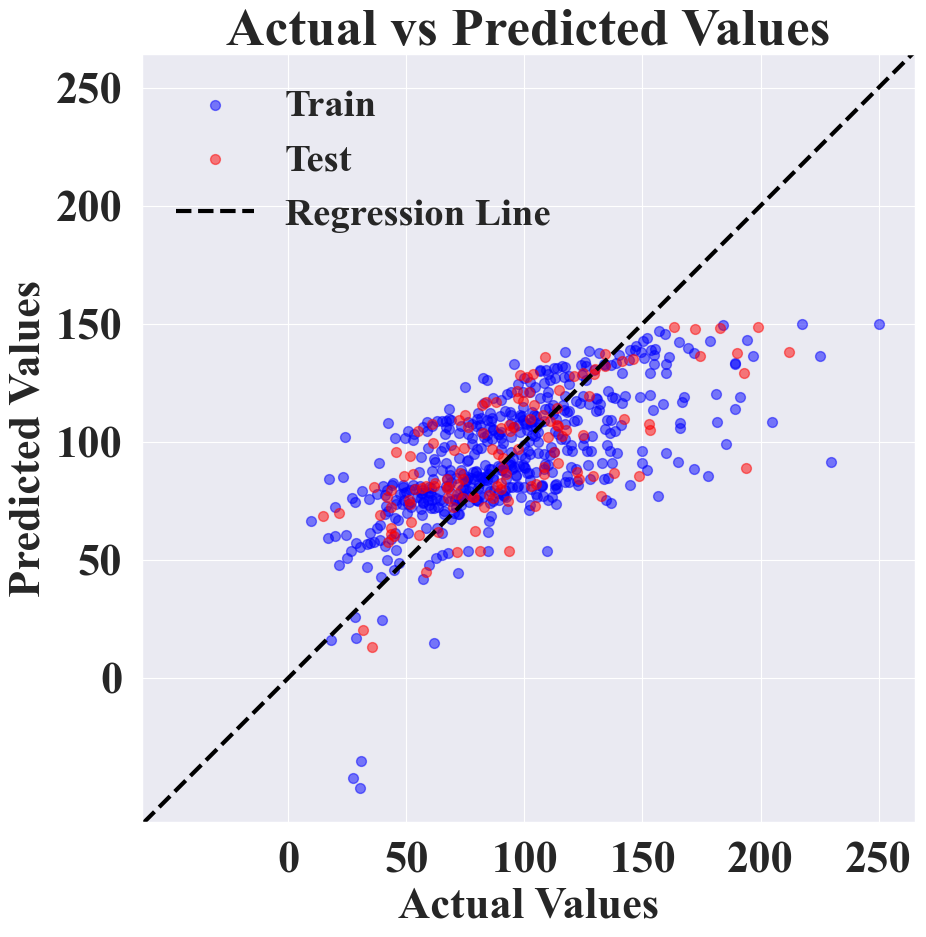

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.437779,22.446359,32.400998,29.433583,0.477845,22.507983,31.239787,28.537983


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/lr.png')

lr_metrics

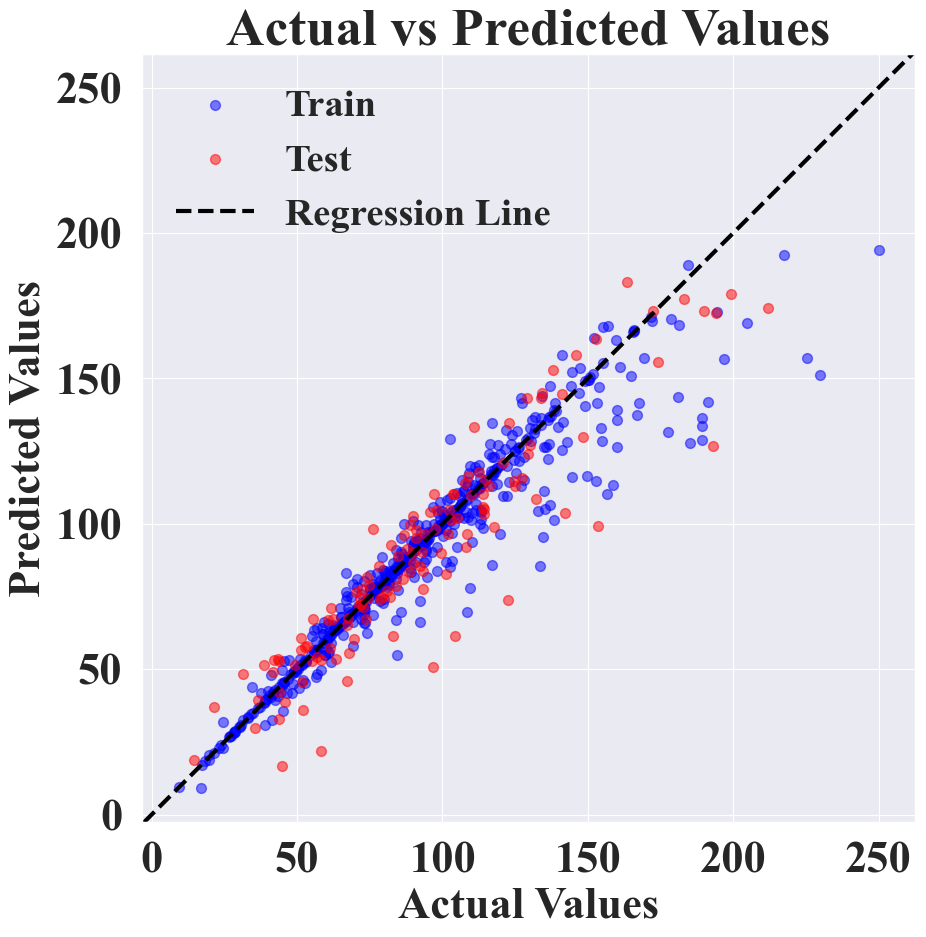

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,SVR,0.899551,6.251525,5.756117,12.441229,0.844961,10.776437,12.685619,15.550482


In [6]:
from sklearn.svm import SVR

svr = SVR(C=5, kernel='poly', degree=6, gamma='scale', coef0=7)
svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'SVR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/svr.png')

svr_metrics

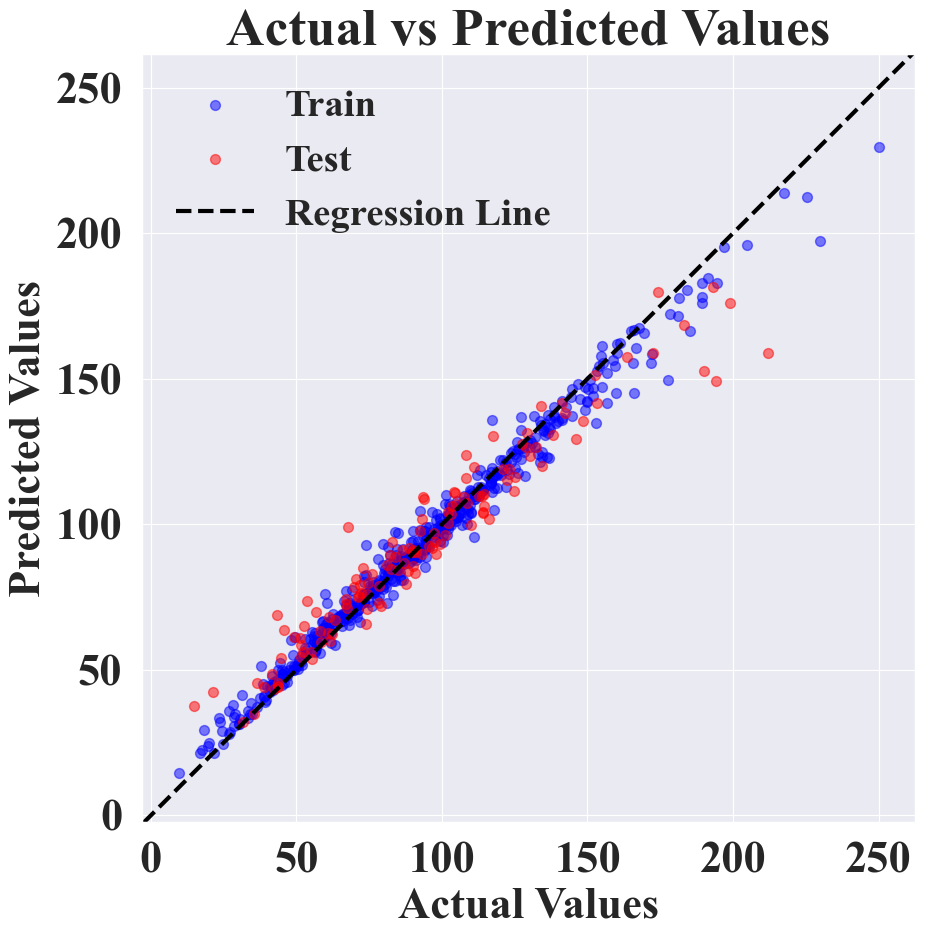

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Randon Forest,0.980199,3.781156,4.938635,5.523744,0.918264,7.712515,10.292457,11.290959


In [7]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=80,
                            max_depth=11,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=21)
rfr.fit(X_train_scaled, y_train)

y_train_pred = rfr.predict(X_train_scaled)
y_test_pred = rfr.predict(X_test_scaled)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/rfr.png')

rfr_metrics

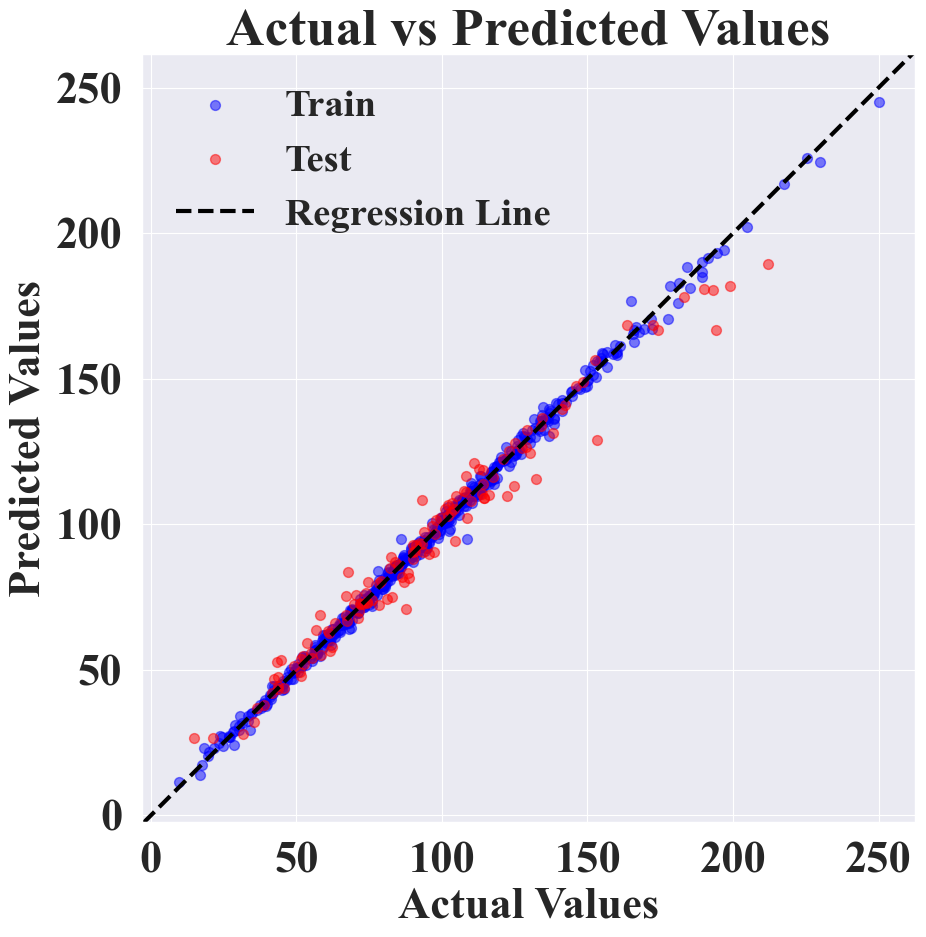

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,GBR,0.997332,1.459404,1.850762,2.027499,0.969986,4.780113,5.884204,6.842086


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=80,
                                alpha=0.07,
                                learning_rate=0.2,
                                max_depth=9,
                                max_features=0.2,
                                min_samples_leaf=3,
                                min_samples_split=7,
                                subsample=0.8,
                                random_state=21)
gbr.fit(X_train_scaled, y_train)

y_train_pred = gbr.predict(X_train_scaled)
y_test_pred = gbr.predict(X_test_scaled)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'GBR')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/gbr.png')

gbr_metrics

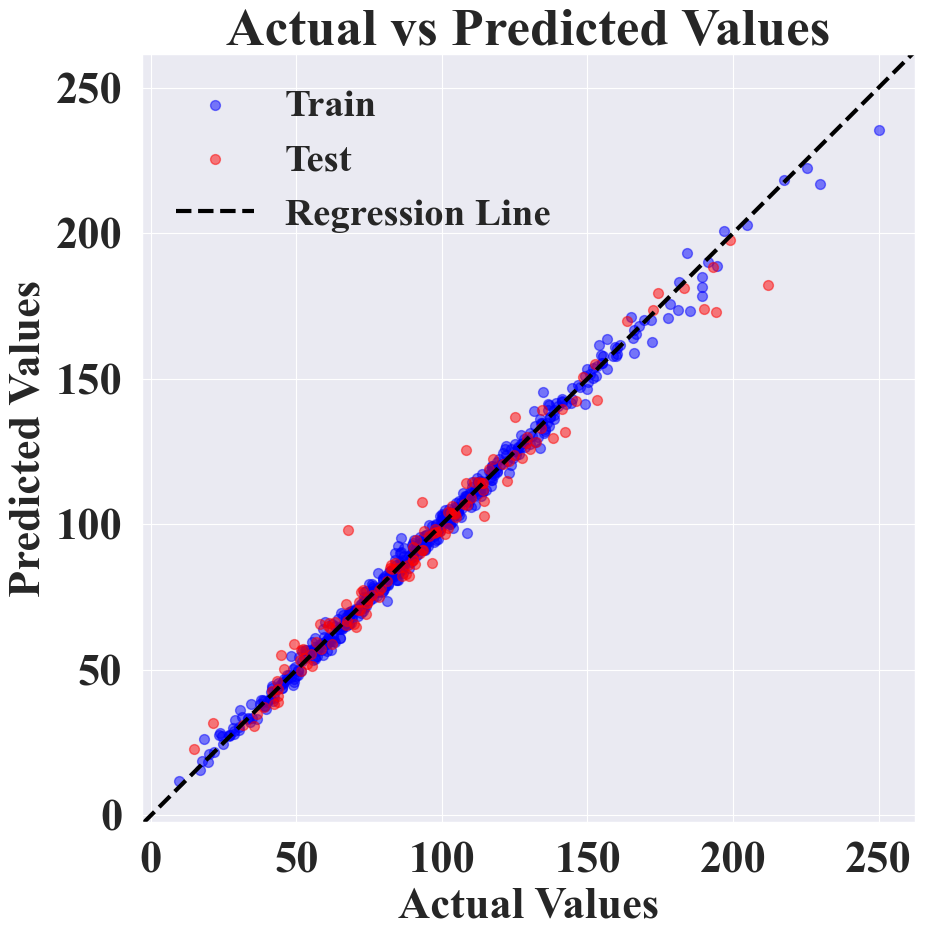

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.994718,2.023322,2.558662,2.852838,0.973892,4.10786,5.345831,6.381338


In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=80,
                   learning_rate=0.14,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.35,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.6,
                   random_state=21)
xgb.fit(X_train_scaled, y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/XGB.png')

xgb_metrics

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9501.0557 - mae: 89.3682 - val_loss: 8715.4482 - val_mae: 83.5273
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6150.4600 - mae: 68.7595 - val_loss: 1976.4153 - val_mae: 35.1900
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2028.3971 - mae: 34.8700 - val_loss: 1555.2559 - val_mae: 30.5626
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1144.3811 - mae: 25.5248 - val_loss: 1261.2400 - val_mae: 28.7462
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 904.5757 - mae: 23.3327 - val_loss: 1131.5615 - val_mae: 25.1404
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 791.3901 - mae: 21.0670 - val_loss: 1024.9004 - val_mae: 24.3564
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 731.2437 - mae: 20.1920 - val_loss: 967.6044 - val_mae: 23.5805
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 651.3923 - mae: 18.9074 - val_loss: 935.6787 - val_mae: 23.17

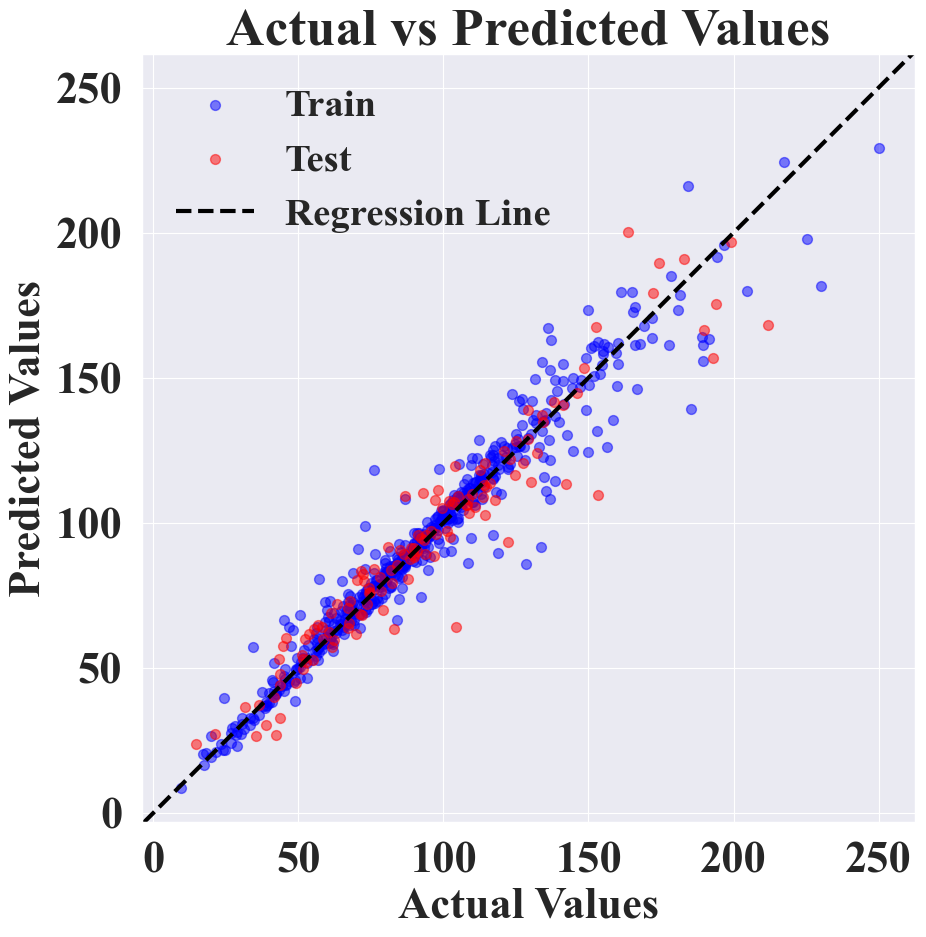

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,ANN,0.943979,5.567392,6.119451,9.291073,0.915148,7.54825,8.89766,11.504146


In [10]:
from keras import Input
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# 编译模型，指定优化器、损失函数和评价指标
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 初始化早停回调
early_stopper = EarlyStopping(
    monitor='val_loss',     # 监控验证集损失
    min_delta=0.001,        # 表示监控指标至少需要改善 0.001
    patience=50,            # 如果30个epoch内验证集损失没有改善，则提前停止训练
    verbose=1,              # 输出早停信息
    mode='min',             # 监控的指标是损失，应该减小
    restore_best_weights=True  # 训练结束后，模型权重回滚到最佳状态
)

# 训练模型
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 使用20%的数据作为验证集
    epochs=1000,  # 最大训练轮数
    callbacks=[early_stopper],  # 使用早停机制
    verbose=1  # 输出训练信息
)

# 预测训练集和测试集
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

ann_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'ANN')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'output/figures/ann.png')

ann_metrics

In [11]:
metrics = pd.concat([lr_metrics, svr_metrics, rfr_metrics, gbr_metrics, xgb_metrics, ann_metrics])
metrics.to_markdown('output/report/report_models.md', index=False, tablefmt='github')
metrics

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.437779,22.446359,32.400998,29.433583,0.477845,22.507983,31.239787,28.537983
0,SVR,0.899551,6.251525,5.756117,12.441229,0.844961,10.776437,12.685619,15.550482
0,Randon Forest,0.980199,3.781156,4.938635,5.523744,0.918264,7.712515,10.292457,11.290959
0,GBR,0.997332,1.459404,1.850762,2.027499,0.969986,4.780113,5.884204,6.842086
0,XGBoost,0.995362,1.915832,2.460608,2.673375,0.972827,4.290130,5.547240,6.510143
0,ANN,0.943979,5.567392,6.119451,9.291073,0.915148,7.548250,8.897660,11.504146
